In [ ]:
import pandas as pd

df = pd.read_csv("./qooqoo_dummy_v0.12.csv", encoding="utf-8")

print(f"Data Shape: {df.shape}")
print(f"Data Columns: {df.columns}")
df[:5]

Data Shape: (2192, 21)
Data Columns: Index(['연도', '월', '일', '기온 (°C)', '강수량 (mm)', '점심 피크타임 손님 수', '저녁 피크타임 손님 수',
       '대인 손님 수', '소인 손님 수', '테이블 회전률', '광어 소비량(g)', '연어 소비량(g)', '장어 소비량(g)',
       '광어 초밥 판매량', '엔가와 초밥 판매량', '연어 초밥 판매량', '연어롤 판매량', '연어 사시미 판매량',
       '장어 초밥 판매량', '장어덮밥 판매량', '장어롤 판매량'],
      dtype='object')


,연도,월,일,기온 (°C),강수량 (mm),점심 피크타임 손님 수,저녁 피크타임 손님 수,대인 손님 수,소인 손님 수,테이블 회전률,...,연어 소비량(g),장어 소비량(g),광어 초밥 판매량,엔가와 초밥 판매량,연어 초밥 판매량,연어롤 판매량,연어 사시미 판매량,장어 초밥 판매량,장어덮밥 판매량,장어롤 판매량
0,2019,1,1,-2.2,0.0,51,68,92,27,3.0,...,2637,255,40,24,45,29,27,18,15,9
1,2019,1,2,3.1,0.8,60,80,100,40,3.2,...,3276,320,47,28,54,35,32,21,18,10
2,2019,1,3,4.6,0.0,60,80,99,41,3.1,...,3651,442,47,28,54,35,32,21,18,10
3,2019,1,4,-1.7,0.0,60,80,101,39,3.4,...,3607,469,47,28,54,35,32,21,18,10
4,2019,1,5,-3.0,0.0,102,170,195,77,3.7,...,6649,1357,93,56,105,68,64,45,38,22


: 

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2192 entries, 0 to 2191
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   연도            2192 non-null   int64  
 1   월             2192 non-null   int64  
 2   일             2192 non-null   int64  
 3   기온 (°C)       2192 non-null   float64
 4   강수량 (mm)      2192 non-null   float64
 5   점심 피크타임 손님 수  2192 non-null   int64  
 6   저녁 피크타임 손님 수  2192 non-null   int64  
 7   대인 손님 수       2192 non-null   int64  
 8   소인 손님 수       2192 non-null   int64  
 9   테이블 회전률       2192 non-null   float64
 10  광어 소비량(g)     2192 non-null   int64  
 11  연어 소비량(g)     2192 non-null   int64  
 12  장어 소비량(g)     2192 non-null   int64  
dtypes: float64(3), int64(10)
memory usage: 222.8 KB


In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

In [60]:
df["Date"] = pd.to_datetime(dict(year=df["연도"], month=df["월"], day=df["일"]))
df = df.sort_values("Date")

# Total Customers 및 Season 컬럼 생성
df["Total Customers"] = df["점심 피크타임 손님 수"] + df["저녁 피크타임 손님 수"]
df["Season"] = df["월"].apply(lambda x:
    "Spring" if x in [3, 4, 5] else
    "Summer" if x in [6, 7, 8] else
    "Autumn" if x in [9, 10, 11] else
    "Winter"
)

<Axes: xlabel='Month', ylabel='Average Total Customers'>

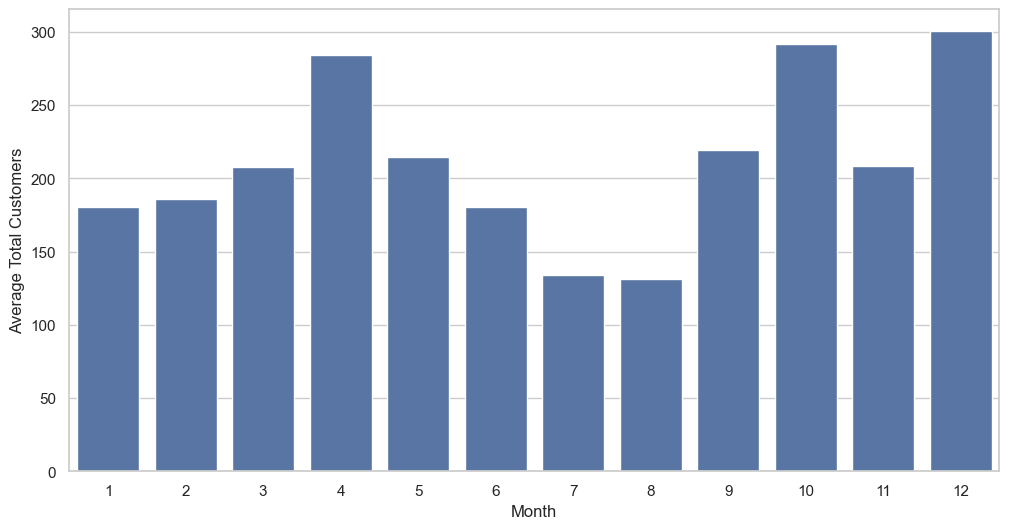

In [61]:
monthly_avg = df.groupby("월")["Total Customers"].mean().reset_index().rename(
    columns={"월": "Month", "Total Customers": "Average Total Customers"}
)

# 시각화 예시:
sns.barplot(data=monthly_avg, x="Month", y="Average Total Customers")

<Axes: xlabel='Season', ylabel='Average Total Customers'>

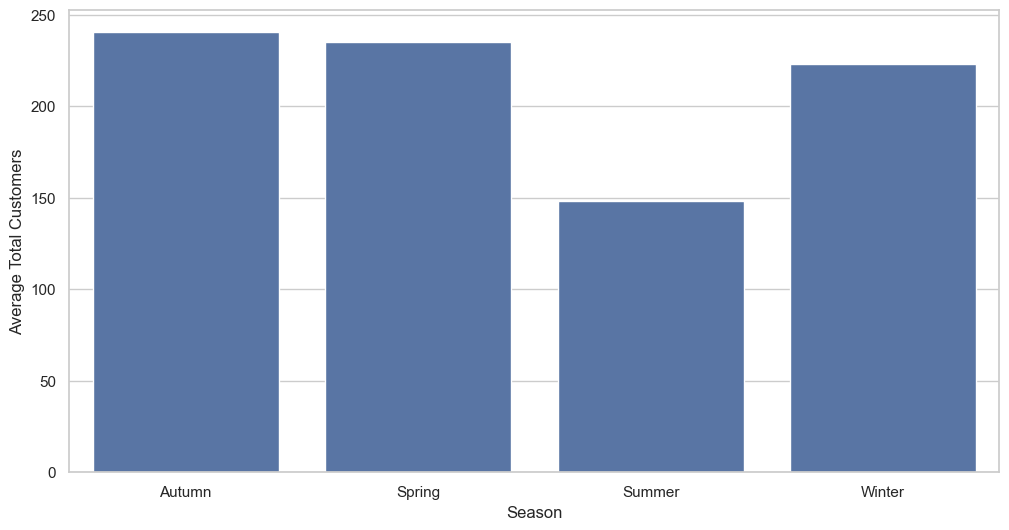

In [ ]:
seasonal_avg = df.groupby("Season")["Total Customers"].mean().reset_index().rename(
    columns={"Total Customers": "Average Total Customers"}
)

# 시각화 예시:
sns.barplot(data=seasonal_avg, x="Season", y="Average Total Customers")

<Axes: xlabel='Date', ylabel='Rolling Avg (30d)'>

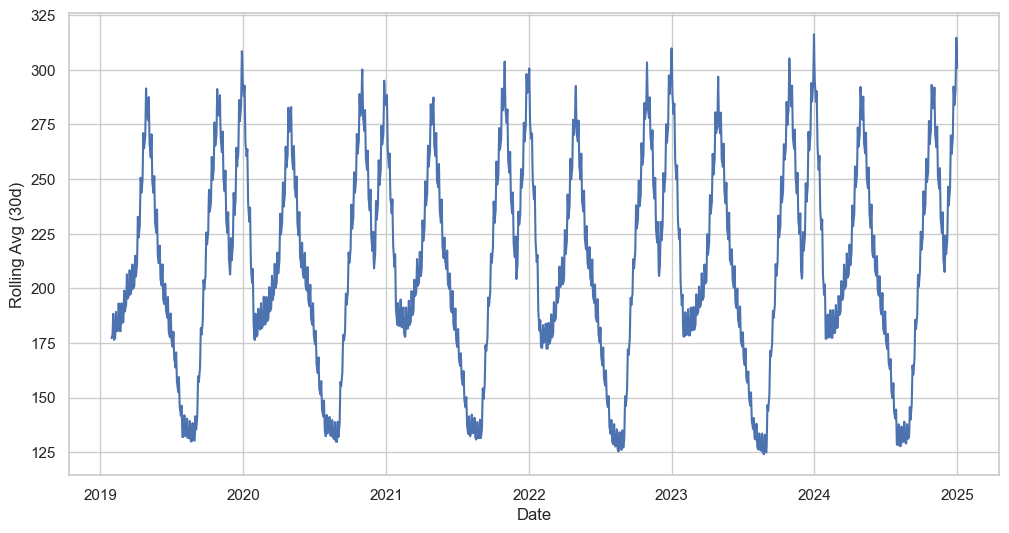

In [64]:
rolling_df = df.set_index("Date")["Total Customers"].rolling(window=30).mean().reset_index().rename(
    columns={"Total Customers": "Rolling Avg (30d)"}
)

# 시각화 예시:
sns.lineplot(data=rolling_df, x="Date", y="Rolling Avg (30d)")

<Axes: xlabel='Temperature (°C)', ylabel='Total Customers'>

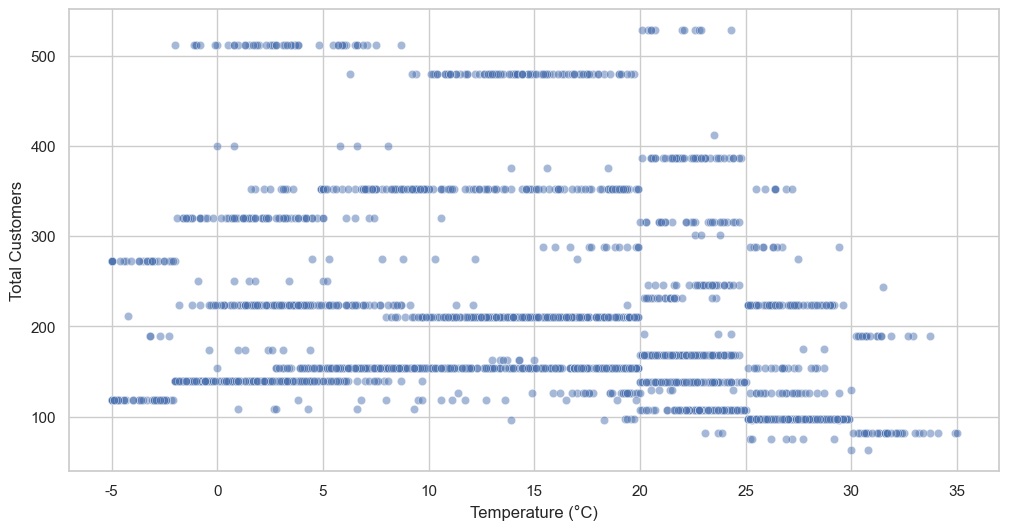

In [65]:
temp_vs_cust = df[["기온 (°C)", "Total Customers"]].rename(
    columns={"기온 (°C)": "Temperature (°C)"}
)

# 시각화 예시:
sns.scatterplot(data=temp_vs_cust, x="Temperature (°C)", y="Total Customers", alpha=0.5)

<Axes: xlabel='Season', ylabel='Table Turnover'>

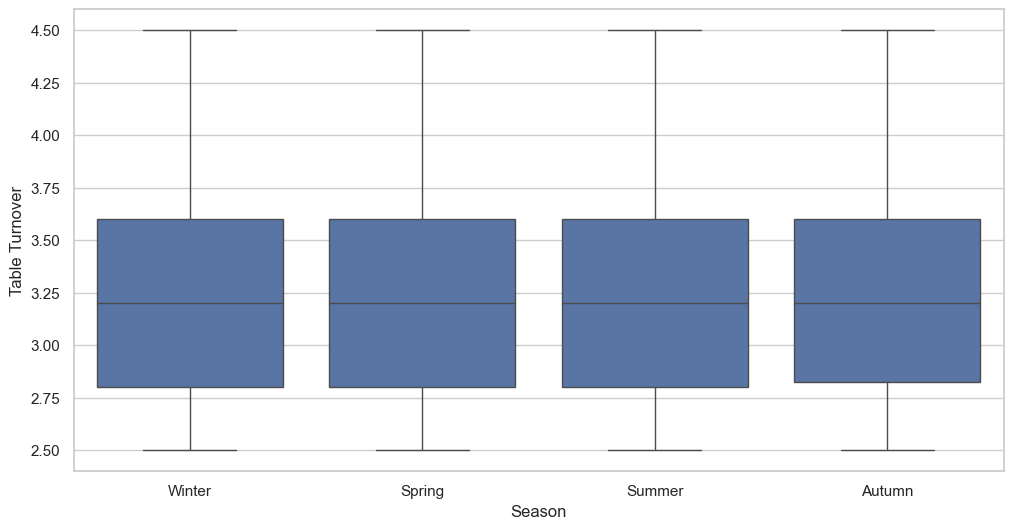

In [66]:
seasonal_turnover = df[["Season", "테이블 회전률"]].rename(
    columns={"테이블 회전률": "Table Turnover"}
)

# 시각화 예시:
sns.boxplot(data=seasonal_turnover, x="Season", y="Table Turnover")

<Axes: xlabel='Date'>

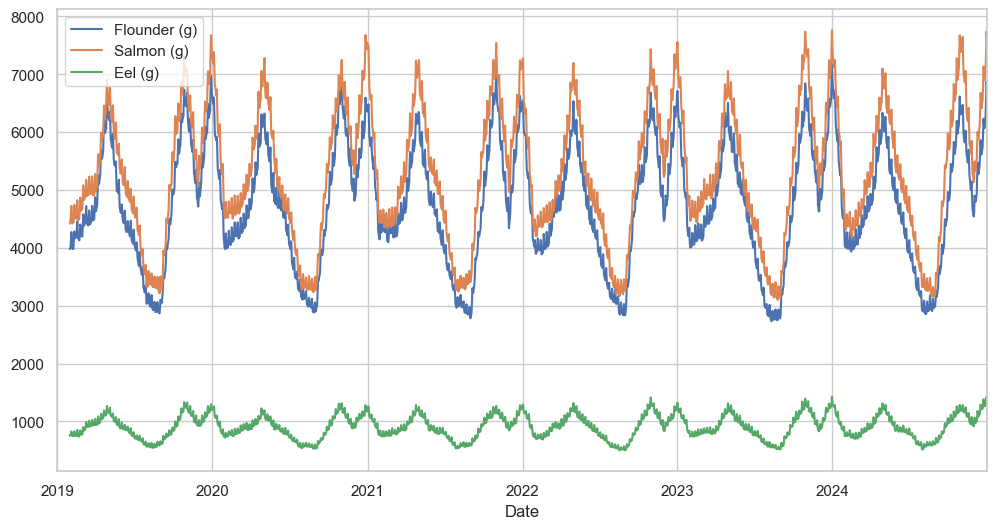

In [67]:
rolling_sushi = df.set_index("Date")[["광어 소비량(g)", "연어 소비량(g)", "장어 소비량(g)"]].rolling(30).mean().rename(
    columns={
        "광어 소비량(g)": "Flounder (g)",
        "연어 소비량(g)": "Salmon (g)",
        "장어 소비량(g)": "Eel (g)"
    }
).reset_index()

# 시각화 예시:
rolling_sushi.plot(x="Date", y=["Flounder (g)", "Salmon (g)", "Eel (g)"])